https://www.markdownguide.org/cheat-sheet/

# Testarea Automată a Circuitelor
        --- Îndrumar de Laborator ---

### Lucrarea nr. 4 - Castigul amplificatorului
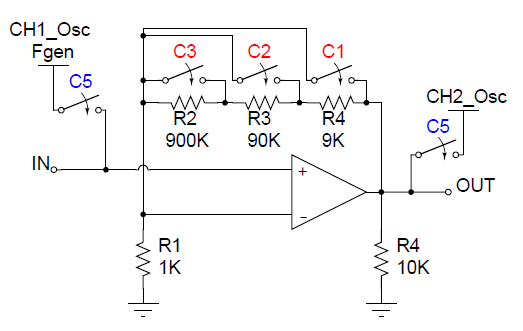

#### 1.1 Montajul experimental:


#### 1.2 Procedura de masurare:
Folosind o buclă de tip „for” se va varia frecventa unui semnal sinusoidal si se va monitoriza cu osciloscopul amplitudinea semnalului de la iesirea respectiv intrarea amplificatorului. Raportul celor doua amplitudini reprezinta castigul amplificatorului. Se va trasa caracteristica castig vs. frecventa a amplificatorului.


#### 1.3 Codul sursa:
1.3.1 Initializarea instrumentelor si a interfetelor grafice

In [ ]:
#using TIVM; # libraria responsabila de comunicatia cu instrumentele si cu interfetele grafice(front panels)
#using Plots; # libraria responsabila de generarea de grafice
#using DataFrames; #
#using CSV; # libraria responsabila de salvarea datelor in format .csv

In [38]:
# dmm_handle = connect!("ASRL4::INSTR")
# psu_handle = connect!("ASRL5::INSTR")
fgen_handle = connect!("ASRL1::INSTR")
scope_handle = connect!("USB0::0x0699::0x0364::C057729::INSTR")

# dmm = TIVM.GDM8246(dmm_handle);
# psu = TIVM.PST3201(psu_handle);
fgen = TIVM.GFG3015(fgen_handle);
scope = TIVM.TDS2002B(scope_handle);

In [12]:
# Panouri frontale pentru instrumente
#@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle, fgen_handle = fgen_handle, scope_handle = scope_handle)
Threads.@spawn start_gui(fgen_handle = fgen_handle, scope_handle = scope_handle);

1.3.2 Connfigurarea instrumentelor

In [47]:
# Generatorul de semnal
set_wfm(fgen, "C1", "sinusoid")
sleep(1)
set_freq(fgen, "C1", 1000)
sleep(1)
set_amplit_unit(fgen, "C1", "Vpp")
sleep(1)
set_amplit(fgen, "C1", 0.1)
sleep(1)
set_offs(fgen, "C1", 0)
sleep(1)
set_duty(fgen, "C1", 50)
sleep(1)

In [40]:
# Osciloscopul
#autoset is hidden :P
#ch coupling - WIP
set_ch_position(scope, "CH1", 0)
set_ch_position(scope, "CH2", 0)
#ch probe - do we need this?
set_vertical_scale(scope, "CH1", 1) # ce facem cu canalele? le numim pe toate CHx in loc de Cx????
set_vertical_scale(scope, "CH2", 1)
set_horizontal_scale(scope, 0.005)
set_trig_ch(scope, "CH1")
set_trig_mode(scope, "NORMAL") # "NORMAL"/"AUTO"
set_trig_level(scope, 0.005)
# do we need trigger coupling or slope?
# Masuratori - se pot configura maxim 5 pt ambele canale impreuna
set_meas(scope, "MEAS1", "CH1", "FREQuency")
set_meas(scope, "MEAS2", "CH1", "PK2pk")
set_meas(scope, "MEAS3", "CH2", "FREQuency")
set_meas(scope, "MEAS4", "CH2", "PK2pk")
set_meas(scope, "MEAS5", "CH1", "PERIod")

1.3.3 Definirea stimulilor si a variabilelor auxiliare

In [48]:
freq = exp10.(1:0.25:7) # create a log vector of frequencies
fgen_amplit = 0.05
dc_gain = 100 # setat din relee

100

1.3.4 Bucla de masurare

In [44]:
in_freq = []
in_amplit_meas = []
out_amplit_meas = []
gain = []
crt_meas_amplit_out = 0
crt_meas_amplit_in = 0
set_vertical_scale(scope, "CH1", fgen_amplit/2)
set_vertical_scale(scope, "CH2", dc_gain*fgen_amplit)
set_amplit(fgen, "C1", fgen_amplit) 
for crt_freq in freq
    set_freq(fgen, "C1", crt_freq)
    tbase = 1/crt_freq
    set_horizontal_scale(scope, tbase)                                
    sleep(2) # fgen and osc are slow to respond

    crt_meas_amplit_in = get_meas_data(scope, "MEAS2")
    crt_meas_amplit_out = get_meas_data(scope, "MEAS4")

    crt_gain = crt_meas_amplit_out/crt_meas_amplit_in
    
    # store crt stimuli value
    push!(in_freq, crt_freq)

    # store crt measurement value
    push!(in_amplit_meas, crt_meas_amplit_in)
    push!(out_amplit_meas, crt_meas_amplit_out)
    push!(gain, crt_gain)

    # print info to console
    @info "crt_freq=$crt_freq, crt_meas_amplit_in=$crt_meas_amplit_in, crt_meas_amplit_out=$crt_meas_amplit_out,crt_gain=$crt_gain"
end

┌ Info: crt_freq=10.0, crt_meas_amplit_in=0.2008000016, crt_meas_amplit_out=18.1199989319,crt_gain=90.23903778644193
└ @ Main In[44]:30
┌ Info: crt_freq=17.78279410038923, crt_meas_amplit_in=0.1951999962, crt_meas_amplit_out=19.0799999237,crt_gain=97.74590315130345
└ @ Main In[44]:30
┌ Info: crt_freq=31.622776601683793, crt_meas_amplit_in=0.191200003, crt_meas_amplit_out=19.0799999237,crt_gain=99.7907930142658
└ @ Main In[44]:30
┌ Info: crt_freq=56.23413251903491, crt_meas_amplit_in=0.193599999, crt_meas_amplit_out=19.0799999237,crt_gain=98.55371912321137
└ @ Main In[44]:30
┌ Info: crt_freq=100.0, crt_meas_amplit_in=0.1928000003, crt_meas_amplit_out=19.0799999237,crt_gain=98.96265505192534
└ @ Main In[44]:30
┌ Info: crt_freq=177.82794100389228, crt_meas_amplit_in=0.1943999976, crt_meas_amplit_out=18.9600009918,crt_gain=97.53087050346754
└ @ Main In[44]:30
┌ Info: crt_freq=316.22776601683796, crt_meas_amplit_in=0.191200003, crt_meas_amplit_out=19.0799999237,crt_gain=99.7907930142658
└ @

 1.3.5 Oprirea instrumentelor

In [45]:
set_amplit(fgen, "C1", 0.02) 

1.3.6 Generarea caracteristicilor, dupa incheierea masuratorilor

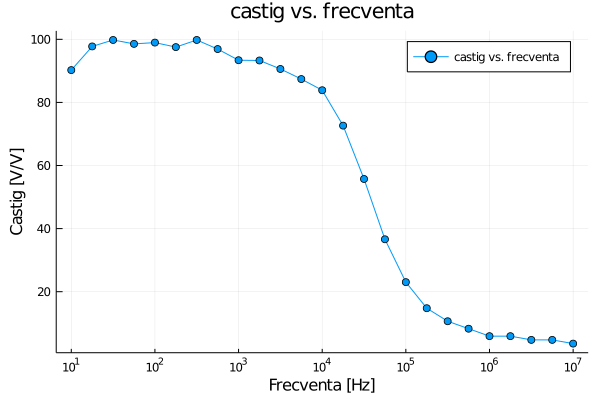

In [46]:
# castig vs frecventa
h1=plot(in_freq, gain; xaxis=:log, markershape=:circle, label="castig vs. frecventa");
title!("castig vs. frecventa");
xlabel!("Frecventa [Hz]");
ylabel!("Castig [V/V]");
display(h1)

1.3.7 Salvarea datelor in fisierul .csv

In [49]:
df = DataFrame(
    "Frecventa [Hz]" => in_freq,
    "Amplitudinea la intrare [V]" => in_amplit_meas,
    "Amplitudinea la iesire [V]" => out_amplit_meas,
    "Castig [V/V]" => gain,
    )
CSV.write("04_castig_amplif.csv", df)

"04_castig_amplif.csv"

1.3.8 Deconectarea instrumentelor

In [50]:
disconnect!(fgen_handle)
disconnect!(scope_handle)

0

#### 1.4 Desfasurarea lucrarii:

1. Măsurați caracteristicile câștig-frecvență pentru G=1 (Vin=3Vrms), G=10 (Vin=0.3Vrms) și G=100 (Vin=0.03Vrms). Comparați precizia măsurătorilor efectuate cu osciloscopul și multimetrul. Afișați toate caracteristicile pe același grafic.